In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data=pd.read_csv('/content/drive/MyDrive/netflix_project/Flight_Booking.csv')

In [12]:
data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [13]:
data.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [14]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [15]:
data.shape

(300153, 11)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [17]:
data.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [18]:
data.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

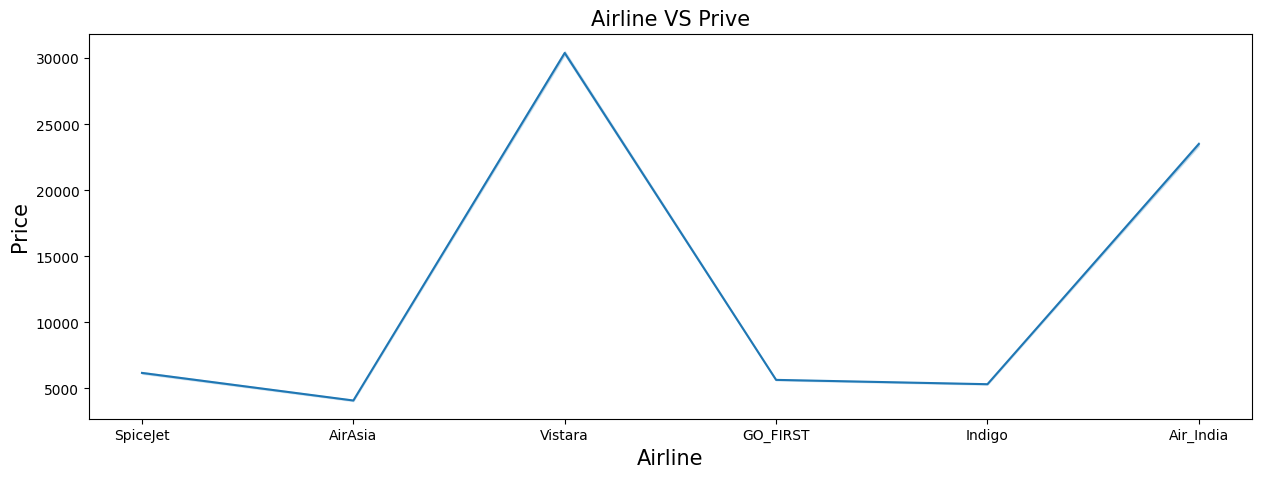

In [19]:
plt.figure(figsize=(15,5))
sns.lineplot(x=data['airline'],y=data['price'])
plt.title('Airline VS Prive',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

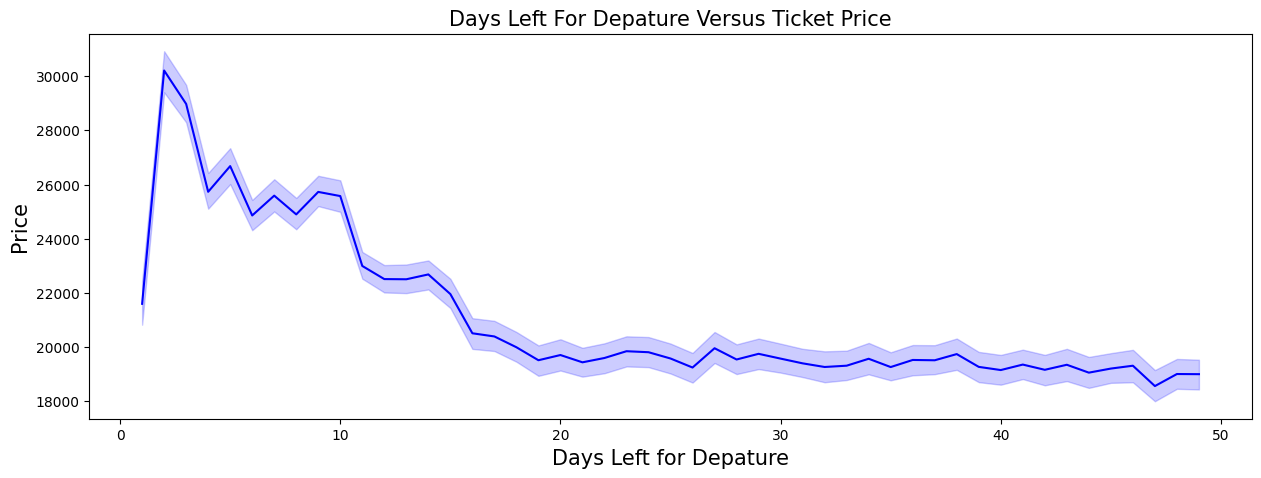

In [20]:
plt.figure(figsize=(15,5))
sns.lineplot(data=data,x='days_left',y='price',color='blue')
plt.title('Days Left For Depature Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left for Depature',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Text(0.5, 1.0, 'price range of all flight')

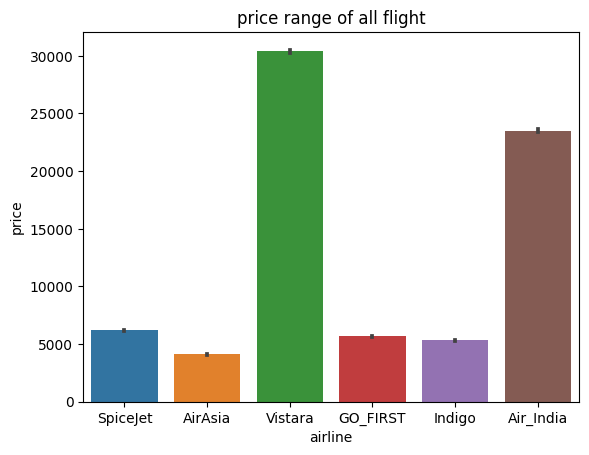

In [21]:
sns.barplot(x=data['airline'],y=data['price'])
plt.title('price range of all flight')

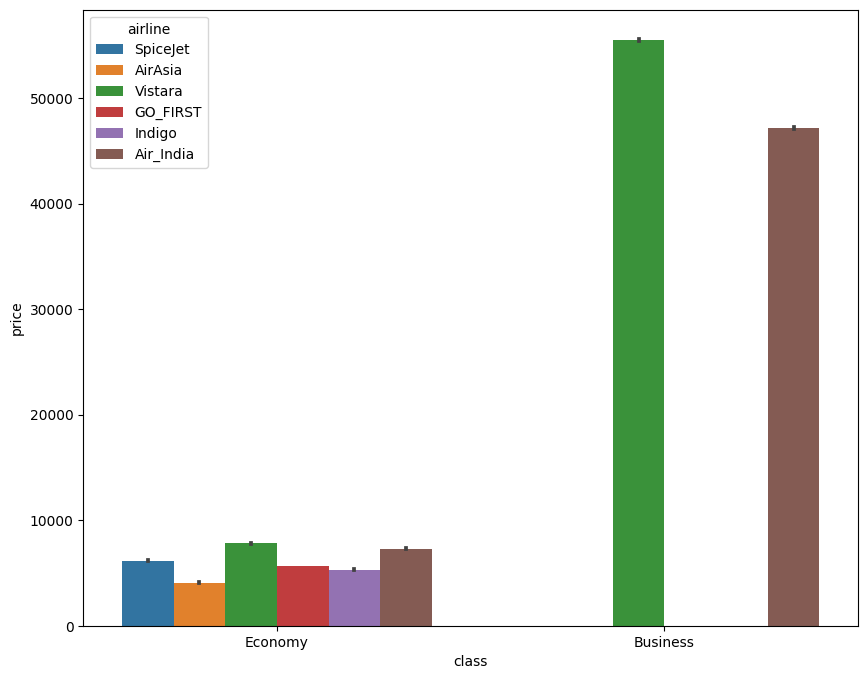

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(x=data['class'],y=data['price'],hue=data['airline'])
plt.show()

In [25]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<Axes: xlabel='days_left', ylabel='price'>

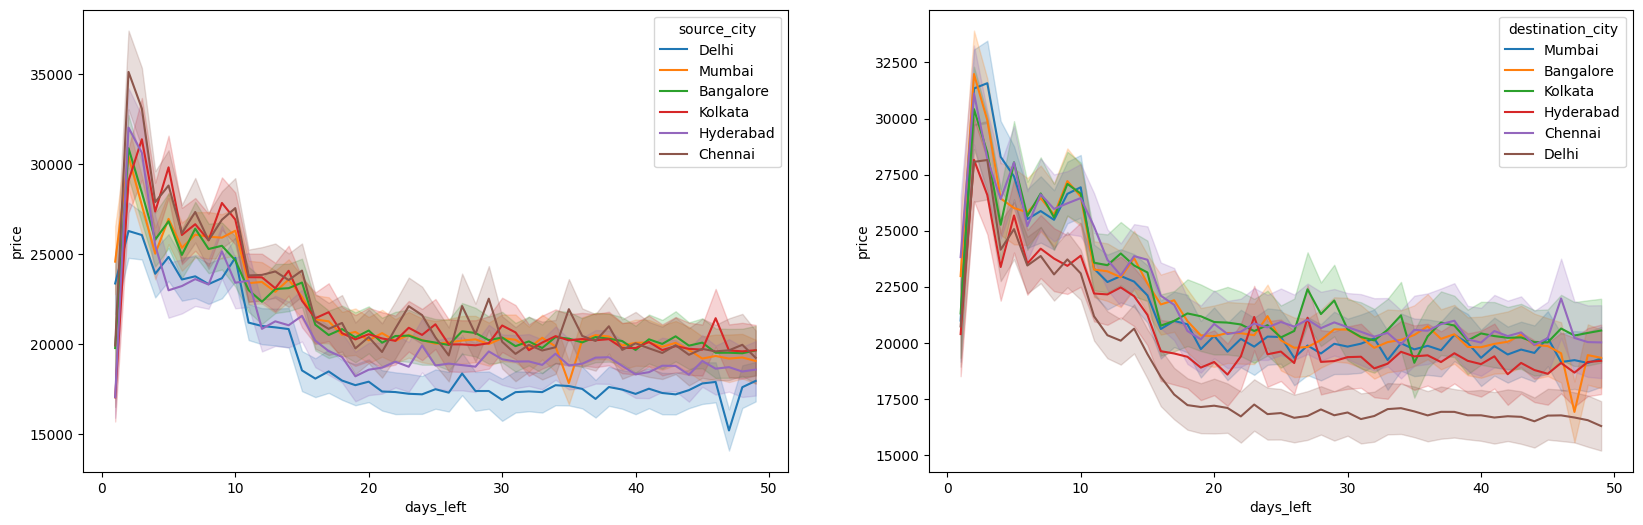

In [24]:
#Range of price of flight with source and destination according to the days left
plt.subplots(1,2,figsize=(20,6))

plt.subplot(1,2,1)
sns.lineplot(data=data,x='days_left',y='price',hue='source_city')

plt.subplot(1,2,2)
sns.lineplot(data=data,x='days_left',y='price',hue='destination_city')

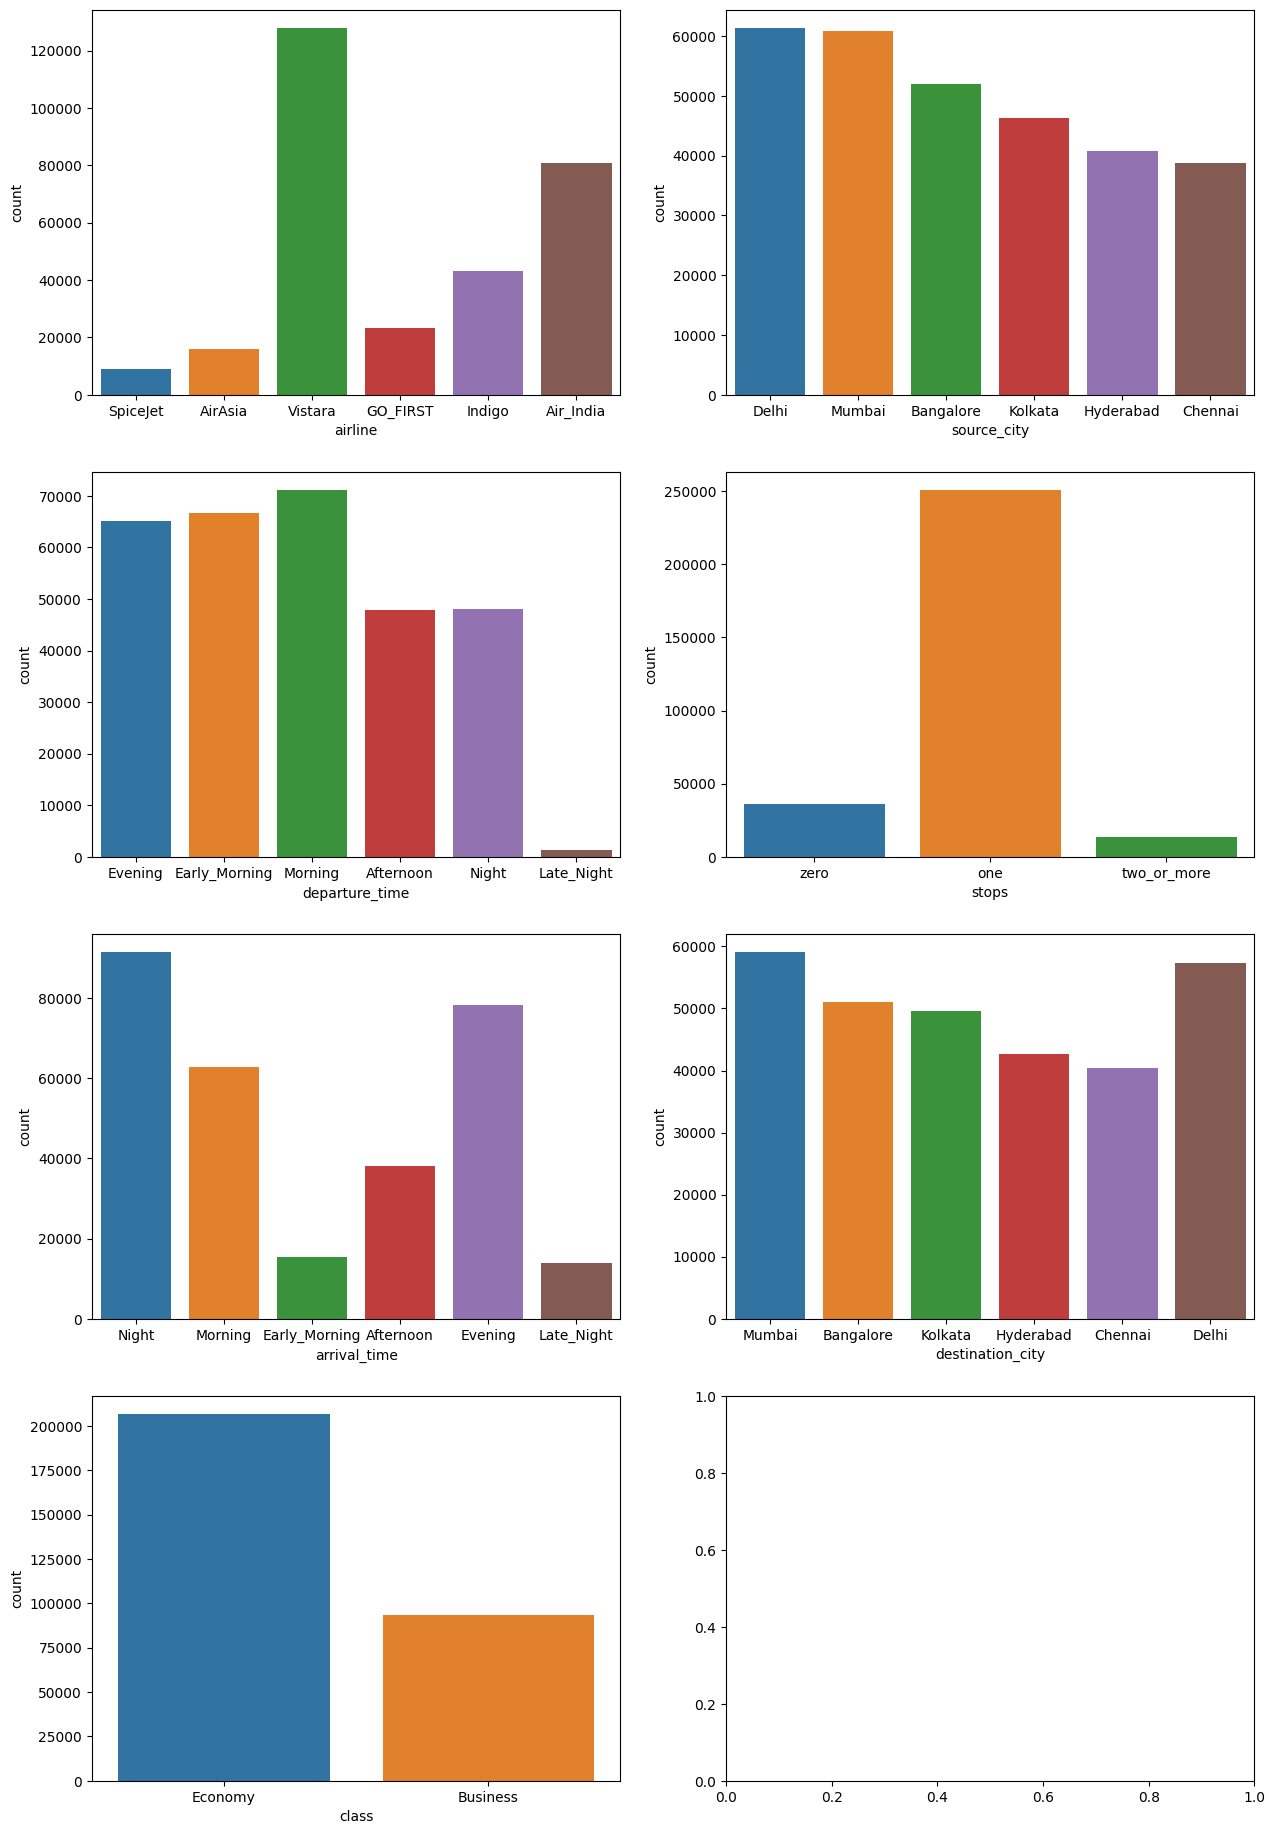

In [26]:
#Visualization of categorical features with countplot

plt.subplots(4,2,figsize=(15,23))

plt.subplot(4,2,1)
sns.countplot(x='airline',data=data)


plt.subplot(4,2,2)
sns.countplot(x='source_city',data=data)


plt.subplot(4,2,3)
sns.countplot(x='departure_time',data=data)

plt.subplot(4,2,4)
sns.countplot(x='stops',data=data)

plt.subplot(4,2,5)
sns.countplot(x='arrival_time',data=data)

plt.subplot(4,2,6)
sns.countplot(x='destination_city',data=data)

plt.subplot(4,2,7)
sns.countplot(x='class',data=data)

plt.show()

In [27]:
#performing label encoder-one hot encoding

from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()

In [29]:
for i in data.columns:
  if data[i].dtype=='object':
    data[i]=le.fit_transform(data[i])

In [30]:
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,1408,2,2,2,5,5,1,2.17,1,5953
1,4,1387,2,1,2,4,5,1,2.33,1,5953
2,0,1213,2,1,2,1,5,1,2.17,1,5956
3,5,1559,2,4,2,0,5,1,2.25,1,5955
4,5,1549,2,4,2,4,5,1,2.33,1,5955


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  int64  
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 25.2 MB


In [32]:
#plotting the correlation matrix to see the relationship between features and dependent variables

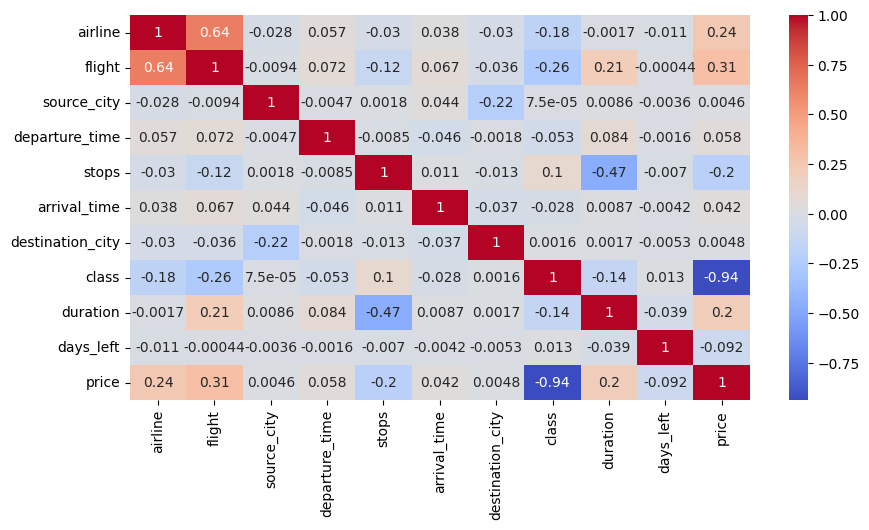

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.show()

In [28]:
data.drop(columns='flight',axis=1,inplace=True)

In [29]:
#seleting the feature using vif , vif should be less than 5, if not than drop the column

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [37]:
lmsstt= []

for i in data.columns:
  if ((data[i].dtype !='object') & (i !='price') &(i !='flight')):
    lmsstt.append(i)

In [38]:
lmsstt

['airline',
 'source_city',
 'departure_time',
 'stops',
 'arrival_time',
 'destination_city',
 'class',
 'duration',
 'days_left']

In [41]:
x=data[lmsstt]

In [42]:
vif_data=pd.DataFrame()

In [43]:
vif_data['feature']=x.columns

In [44]:
vif_data['vif']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [45]:
vif_data

,feature,vif
0,airline,3.393124
1,source_city,2.927766
2,departure_time,2.779427
3,stops,1.426614
4,arrival_time,3.684550
5,destination_city,2.885337
6,class,2.849370
7,duration,4.113876
8,days_left,3.976790


In [47]:
for i in vif_data.values:
  if i[1] < 5:
    print(i[1])

3.3931243370006032
2.9277662179521964
2.779426568393921
1.4266142962944548
3.684550272149718
2.8853373414466703
2.849369637600073
4.113876173212757
3.9767900545656354


In [48]:
#standarlization

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
sc=StandardScaler()

In [51]:
sc.fit_transform(data)

array([[ 0.48827006,  0.74916287, -0.32972125, ..., -1.39753079,
        -1.84387477, -0.65806849],
       [ 0.48827006,  0.69994728, -0.32972125, ..., -1.3752838 ,
        -1.84387477, -0.65806849],
       [-1.69363332,  0.29216101, -0.32972125, ..., -1.39753079,
        -1.84387477, -0.65793631],
       ...,
       [ 1.0337459 ,  0.93196361, -0.90057609, ...,  0.22371837,
         1.69569214,  2.56454459],
       [ 1.0337459 ,  0.92493281, -0.90057609, ..., -0.30881888,
         1.69569214,  2.67407096],
       [ 1.0337459 ,  0.91087121, -0.90057609, ..., -0.29769538,
         1.69569214,  2.67407096]])

In [52]:
x=data.iloc[:,:-1]
y=data.loc[:,'price']

In [53]:
#training and testing data
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [56]:
lin=LinearRegression()

In [57]:
lin.fit(x_train,y_train)

LinearRegression()

In [58]:
y_pred=lin.predict(x_test)

In [59]:
y_pred

array([ 4567.01341606, 52844.3396735 ,  7904.94955226, ...,
        5843.83528502, -1684.52051377, 58731.61105007])

In [60]:
y_test

27131      7366
266857    64831
141228     6195
288329    60160
97334      6578
          ...  
5234       5026
5591       3001
168314     6734
175191     5082
287693    66465
Name: price, Length: 60031, dtype: int64

In [61]:
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_','Predict_'])

In [62]:
difference

,Actual_,Predict_
0,7366.0,4567.013416
1,64831.0,52844.339673
2,6195.0,7904.949552
3,60160.0,56121.015486
4,6578.0,6672.773495
...,...,...
60026,5026.0,5824.337078
60027,3001.0,371.004613
60028,6734.0,5843.835285
60029,5082.0,-1684.520514


In [63]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

In [64]:
r2=r2_score(y_test,y_pred)
r2

0.9045747930770209

In [65]:
from sklearn import metrics

In [66]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mae

4622.187103361371

In [67]:
mean_absolute_percentage_error(y_test,y_pred)

0.43444046400251857

In [68]:
mean_squared_error(y_test,y_pred)

49190002.6204374

In [69]:
np.sqrt(metrics.mean_absolute_error(y_test,y_pred))

67.98666857084093

<ipython-input-70-93f1d78a1da6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
<ipython-input-70-93f1d78a1da6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='predict')


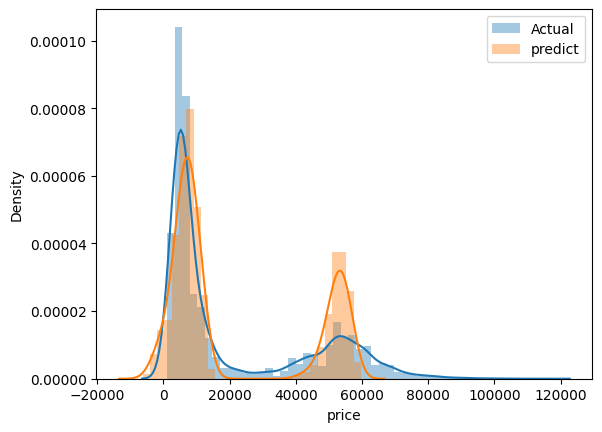

In [70]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='predict')
plt.legend()
plt.show()

In [71]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

In [72]:
dt=DecisionTreeRegressor()

In [73]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [74]:
y_pred=dt.predict(x_test)

In [75]:
r2=r2_score(y_test,y_pred)
r2

0.9828099214091457

In [76]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mae

892.5150561098989

In [84]:
mean_absolute_percentage_error(y_test,y_pred)

0.057429249601067635

In [85]:
mean_squared_error(y_test,y_pred)

5394734.79024873

In [86]:
np.sqrt(metrics.mean_absolute_error(y_test,y_pred))

29.402052544791957

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
ra=RandomForestRegressor()

In [82]:
ra.fit(x_train,y_train)


RandomForestRegressor()

In [87]:
y_pred=ra.predict(x_test)

In [88]:
r2=r2_score(y_test,y_pred)
r2

0.9895345871878406

In [89]:
mae=metrics.mean_absolute_error(y_test,y_pred)
mae

864.4806938467073

In [93]:
mean_absolute_percentage_error(y_test,y_pred)

0.057429249601067635

In [94]:
mean_squared_error(y_test,y_pred)

5394734.79024873

In [95]:
np.sqrt(metrics.mean_absolute_error(y_test,y_pred))

29.402052544791957

<ipython-input-98-b77075e7b2b4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
<ipython-input-98-b77075e7b2b4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predict')


AttributeError: ignored

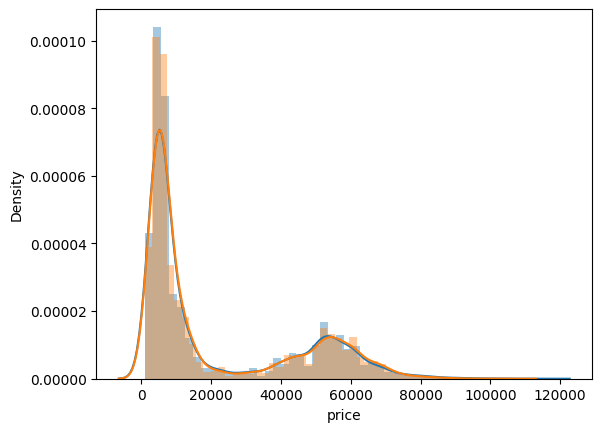

In [98]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predict')
plt.legends